# Отток клиентов

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt
import os

# Оглавление
- [1. Введение](#1.)
- [1.1. Описание данных](#1.1.)
- [1.2. Описание проекта](#1.2.)
- [1.3. Исследование и подготовка данных](#1.3.)
- [1.4. Исследование баланса классов](#1.4.)
- [2. Машинное обучение](#2.)
- [2.1. Без учета дисбаланса классов](#2.1.)
- [2.1.1. Логистическая регрессия](#2.1.1.)
- [2.1.1.1. Без масштабирования признаков](#2.1.1.1.)
- [2.1.1.2. C масштабированим признаков](#2.1.1.2.)
- [2.1.2. Случайный лес](#2.1.2.)
- [2.2. С учетом дисбаланса классов](#2.2.)
- [2.2.1. Скорректируем параметр class_weight](#2.2.1.)
- [2.2.2. Со взвешенными классами на тестовой выборке](#2.2.2.)
- [2.2.3. Upsampling](#2.2.3.)
- [2.2.4. Лучший вариант upsampling на тестовой выборке](#2.2.4.)
- [2.2.5. Downsampling](#2.2.5.)
- [2.2.6. Лучший вариант downsampling на тестовой выборке](#2.2.6.)
- [2.2.7. Upsampling + Downsampling](#2.2.7.)
- [2.2.8. Лучший вариант Upsampling + Downsampling на смешанной выборке на тестовом датасете](#2.2.8.)
- [2.2.9. Лучшая балансировка классов.  Визуализация.](#2.2.9.)
- [3. Выводы](#3.)

# 1. Введение
<a id="1."></a>

## 1.1. Описание данных
<a id="1.1."></a>

Признаки

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак
- Exited — факт ухода клиента


# 1.2. Описание проекта
<a id="1.2."></a>
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.
Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

In [2]:
path1 = 'Churn.csv'
path2 = '/datasets/Churn.csv'
if os.path.exists(path1):
    df = pd.read_csv(path1)
    print(f'файл {path1} загружен из корневой директории')
elif os.path.exists(path2):
    df = pd.read_csv(path2)
    print(f'файл {path1} загружен из директории datasets')
else:
    print(f'файл {path1} не найден')

файл Churn.csv загружен из корневой директории


# 1.3. Исследование и подготовка данных
<a id="1.3."></a>

In [3]:
# посмотрим на данные
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# выведем информацию а датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# посмотрим на строки с пропусками в 'Tenure'
df[df['Tenure'].isna()].head()
# обычные строки, только с пропусками

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


**Выводы:**
1. 'RowNumber' - порядковый номер строки (не стал здесь приводить сследования по данному вопросу) необходимо удалить, т.к. никакой информации не несет.
2. 'CustomerId', 'Surname',  - в нашем случае не нужен, и, к тому же, не несет смысловой нагрузки. В процессе обучения и прогнозирования является лишним. Так же необходимо удалить.
3. 'Geogrphy', 'Gender' -  для данного столбца требуется кодирование значения. Для всех моделей применим OHE
4. 'Tenure' - присутствуют пропуски. Какая причина этого неизвестно, и, вероятно, если удалить строки с пропуском в данном столбце, модель будет давать более лучшие прогнозы, но поскольку стоит задача обучить модель на существующих данных, будем работать с тем, что есть и заменим пропуски медианой. (Хотя, возможно, пропуск значит что клиент не является клиентом банка и тогда надо заменить на 0.)

In [6]:
# удалим столбцы (в соответствии с п.1, 2)
df.drop(columns=['RowNumber', 'CustomerId', 'CustomerId', 'Surname'], axis=1, inplace=True)
# One Hot Encoding !
df = pd.get_dummies(df, drop_first=True)
# заменим пропуски
df.loc[df['Tenure'].isna(),'Tenure'] = df['Tenure'].median()

In [7]:
#df.loc[df['Tenure'].isna(),'Tenure'] = df['Tenure'].median()

In [8]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


# 1.4. Исследование баланса классов
<a id="1.4."></a>

[Text(0, 0.5, 'Количество экземпларов')]

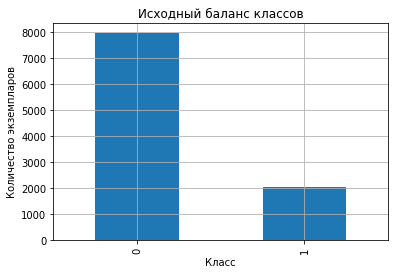

In [9]:
ax= df['Exited'].value_counts().plot(kind='bar', title = 'Исходный баланс классов', grid=True)
ax.set(xlabel = 'Класс')
ax.set(ylabel = 'Количество экземпларов')

Как видно, присутствует 4-х кратный дисбаланс классов. Не то чтобы огромный, но есть.

# 2. Машинное обучение
<a id="2."></a>

In [10]:
# разобьем исходный датафрейм на train и test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis=1), df['Exited'], 
                                                    stratify = df['Exited'], 
                                                    test_size=0.25,
                                                    random_state=42)
# разобьем полученный train еще раз на снова train и validation выборки в той же пропорции
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                      y_train, 
                                                      stratify = y_train, 
                                                      test_size=0.25, 
                                                      random_state=42)

In [11]:
# убедимся, что форма массивов корректная
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)
print('X_valid.shape =', X_valid.shape)
print('y_train.shape =', y_train.shape)
print('y_test.shape =', y_test.shape)
print('y_valid.shape =', y_valid.shape)

X_train.shape = (5625, 11)
X_test.shape = (2500, 11)
X_valid.shape = (1875, 11)
y_train.shape = (5625,)
y_test.shape = (2500,)
y_valid.shape = (1875,)


Разделение на тренировочную и тестовую выборки прошло успешно. 7500 записей на обучение и 2500 на тест.

посмотрим на балансировку классов в полученных датафреймах

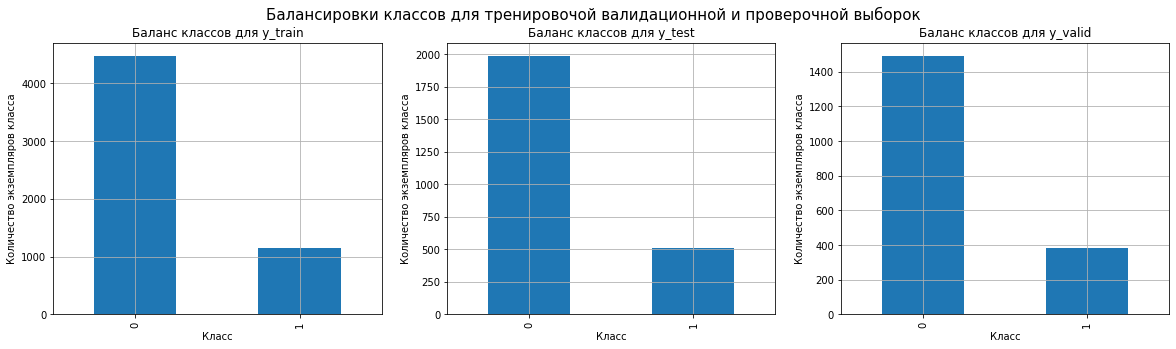

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5)) # размещаем в 1 строку и 2 столбца
fig.suptitle('Балансировки классов для тренировочой валидационной и проверочной выборок', fontsize=15)

y_train.value_counts().plot(ax = axes[0], kind='bar', title = 'Баланс классов для y_train', grid=True)
y_test.value_counts().plot(ax = axes[1], kind='bar', title = 'Баланс классов для y_test', grid=True)
y_valid.value_counts().plot(ax = axes[2], kind='bar', title = 'Баланс классов для y_valid', grid=True)
axes[0].set(xlabel = 'Класс')
axes[1].set(xlabel = 'Класс')
axes[2].set(xlabel = 'Класс')
axes[0].set(ylabel = 'Количество экземпляров класса')
axes[1].set(ylabel = 'Количество экземпляров класса')
axes[2].set(ylabel = 'Количество экземпляров класса')
#axes[0].set_ylim(0, 6000)
#axes[1].set_ylim(0, 6000)
#axes[2].set_ylim(0, 6000)
plt.show()

Как видно баланс классов для всех выборок визуально одинаковый. Численно проверку проводить не будем, т.к. каких-то особых критерив под это не ставилось. 

## 2.1. Без учета дисбаланса классов
<a id="2.1."></a>

### 2.1.1. Логистическая регрессия
<a id="2.1.1."></a>

#### 2.1.1.1. Без масштабирования признаков
<a id="2.1.1.1."></a>

In [13]:
# зададим набор параметров
param_distributions_logreg = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16 ,17 ,  20, 40, 60, 80, 100],
    'tol': [1, 1e-1, 1e-2, 2e-2, 3e-2 , 4e-2 , 5e-2 , 6e-2 , 7e-2, 8e-2 , 9e-2, 1e-3, 2e-3, 3e-3, 4e-3 , 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 1e-4, 1e-5, 1e-6],
    'class_weight': [None], # , 'balanced'
    'multi_class': ['ovr', 'multinomial']}

logreg_model = LogisticRegression(random_state=42)
cv_logreg = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
randomsearch_logreg = RandomizedSearchCV(estimator=logreg_model, param_distributions=param_distributions_logreg, cv=cv_logreg, n_iter= 1000,  scoring='f1', n_jobs=3, random_state=42 )
randomsearch_logreg.fit(X_train, y_train)
randomsearch_logreg_prediction = randomsearch_logreg.predict(X_valid)
# посмотрим на результат и выведем лучшие параметры
print('f1_score =', f1_score(y_valid,  randomsearch_logreg_prediction))
print('roc_auc_score =', roc_auc_score(y_valid,  randomsearch_logreg.predict_proba(X_valid)[:, 1]))
print('best_params = ', randomsearch_logreg.best_params_)

f1_score = 0.07424593967517401
roc_auc_score = 0.6612025403015118
best_params =  {'tol': 0.003, 'multi_class': 'ovr', 'class_weight': None, 'C': 5}


#### 2.1.1.2. C масштабированим признаков
<a id="2.1.1.2."></a>

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [15]:
# зададим набор параметров
param_distributions_logreg = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16 ,17 ,  20, 40, 60, 80, 100],
    'tol': [1, 1e-1, 1e-2, 2e-2, 3e-2 , 4e-2 , 5e-2 , 6e-2 , 7e-2, 8e-2 , 9e-2, 1e-3, 2e-3, 3e-3, 4e-3 , 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 1e-4, 1e-5, 1e-6],
    'class_weight': [None], # , 'balanced'
    'multi_class': ['ovr', 'multinomial']}

logreg_model = LogisticRegression(random_state=42)
cv_logreg = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
randomsearch_logreg = RandomizedSearchCV(estimator=logreg_model, param_distributions=param_distributions_logreg, cv=cv_logreg, n_iter= 1000,  scoring='f1', n_jobs=3, random_state=42)
randomsearch_logreg.fit(X_train_scaled, y_train)
randomsearch_logreg_prediction = randomsearch_logreg.predict(X_valid_scaled)
# посмотрим на результат и выведем лучшие параметры
print('f1_score =', f1_score(y_valid,  randomsearch_logreg_prediction))
print('roc_auc_score =', roc_auc_score(y_valid,  randomsearch_logreg.predict_proba(X_valid)[:, 1]))
print('best_params = ', randomsearch_logreg.best_params_)

f1_score = 0.32523364485981304
roc_auc_score = 0.5013395847287341
best_params =  {'tol': 0.003, 'multi_class': 'ovr', 'class_weight': None, 'C': 1}


Похоже что в данном вопросе логистическая регрессия не очень нам поможет (или я просто не умею её готовить). Применив балансировку или взвешивание классов скорее всего удастся повысиь резульат, но навряд ли настолько значительно, насколько требуется. С учетом этого (ввиду ее не высокой эффективности) придется отказаться от ее дальнейшего применения в настоящем проекте.
Посмотрим, что нам покажет "Случайный лес".

### 2.1.2. Случайный лес
<a id="2.1.2."></a>

In [16]:
%%time
param_distributions_randomforest = {
    'n_estimators': range(10,1001,10), # Лучший параметр
    'min_samples_split': range(20,60,5),
    'max_features': ['sqrt','log2'], # Лучший параметр
    'max_depth': range(2,21,1), #
    'n_jobs': [-1],
    'min_samples_leaf': range(1, 201, 10),
    'bootstrap' : [True, False]} # Лучший параметр


cv_randomforest = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
randomforest_model = RandomForestClassifier(random_state=135)

randomsearch_randomforest = RandomizedSearchCV(estimator=randomforest_model, param_distributions=param_distributions_randomforest, cv=cv_randomforest, n_iter= 120,  scoring='f1', n_jobs=3, random_state=42 )
randomsearch_randomforest.fit(X_train, y_train)

randomforest_best_params = randomsearch_randomforest.best_params_

print('f1_score =', f1_score(y_valid,  randomsearch_randomforest.predict(X_valid)))
print('roc_auc_score =', roc_auc_score(y_valid,  randomsearch_randomforest.predict_proba(X_valid)[:, 1]))
print('best_params = ', randomforest_best_params)

f1_score = 0.5769854132901134
roc_auc_score = 0.8587158923142204
best_params =  {'n_jobs': -1, 'n_estimators': 750, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 18, 'bootstrap': False}
Wall time: 21min 34s


Значительно лучше! f1_score = 0.594 против 0.291 для логистической регрессии.
Посмотрим, что нам даст перебалансировка классов.

## 2.2. С учетом дисбаланса классов
<a id="2.2."></a>

### 2.2.1. Скорректируем параметр class_weight
<a id="2.2.1."></a>

В п. 2.1.2 найдено лучшее сочетание гиперпарметров. Воспользуемся ими и добавим еще один гиперпараметр 'class_weight' со значением 'balanced'.

In [17]:
randomforest_model_class_weighted = RandomForestClassifier(random_state=135,
                                            n_estimators=randomforest_best_params['n_estimators'],
                                            min_samples_split=randomforest_best_params['min_samples_split'],
                                            min_samples_leaf=randomforest_best_params['min_samples_leaf'],
                                            max_features=randomforest_best_params['max_features'],
                                            max_depth=randomforest_best_params['max_depth'],
                                            bootstrap=randomforest_best_params['bootstrap'],
                                            class_weight='balanced')

randomforest_model_class_weighted.fit(X_train, y_train)

print('f1_score =', f1_score(y_valid,  randomforest_model_class_weighted.predict(X_valid)))
print('roc_auc_score =', roc_auc_score(y_valid,  randomforest_model_class_weighted.predict_proba(X_valid)[:, 1]), end='\n----------')

f1_score = 0.6307884856070087
roc_auc_score = 0.8570028369739412
----------

Не плохо! Прирост = 0,024.


### 2.2.2. Cо взвешеннымми классами на тестовой выборке
<a id="2.2.2."></a>

In [18]:
print('f1_score =', f1_score(y_test,  randomforest_model_class_weighted.predict(X_test)))
print('roc_auc_score =', roc_auc_score(y_test,  randomforest_model_class_weighted.predict_proba(X_test)[:, 1]), end='\n----------')

f1_score = 0.6287878787878788
roc_auc_score = 0.8676282958973535
----------

### 2.2.3. Upsampling
<a id="2.2.3."></a>

In [19]:
# подготовим функцию для апсемплинга
def upsample(features, target, repeat):
    """
    функция повышает число записей с целевой переменной = 1 в repeat число раз
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

Посмотрим будет ли прирост score с теми же гиперпараметрами, но с upsamplng-ом. Для этого возьмем полученные лучшие параметры (randomforest_best_params).

In [20]:
best_f1_score_result = 0
for repeat in range(1,5):
    X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, repeat)

    randomforest_model = RandomForestClassifier(random_state=135,
                                                n_estimators=randomforest_best_params['n_estimators'],
                                                min_samples_split=randomforest_best_params['min_samples_split'],
                                                min_samples_leaf=randomforest_best_params['min_samples_leaf'],
                                                max_features=randomforest_best_params['max_features'],
                                                max_depth=randomforest_best_params['max_depth'],
                                                bootstrap=randomforest_best_params['bootstrap'] )

    randomforest_model.fit(X_train_upsampled, y_train_upsampled)

    f1_score_result = f1_score(y_valid,  randomforest_model.predict(X_valid))
    roc_auc_score_result = roc_auc_score(y_valid,  randomforest_model.predict_proba(X_valid)[:, 1])
    print('repeat =', repeat)
    print('f1_score =', f1_score_result)
    print('roc_auc score =', roc_auc_score_result, end='\n----------\n')

    if f1_score_result > best_f1_score_result:
        best_f1_score_result = f1_score_result
        roc_auc_score_result = roc_auc_score_result

        best_upsample_randomforest_model = randomforest_model

print('='*20)
print('best_f1_score=', best_f1_score_result)
print('roc_auc score=', roc_auc_score_result)

repeat = 1
f1_score = 0.5769854132901134
roc_auc score = 0.8587158923142204
----------
repeat = 2
f1_score = 0.6078147612156295
roc_auc score = 0.8578900488492546
----------
repeat = 3
f1_score = 0.6147426981919333
roc_auc score = 0.8562173213214898
----------
repeat = 4
f1_score = 0.6090534979423868
roc_auc score = 0.8558789183730008
----------
best_f1_score= 0.6147426981919333
roc_auc score= 0.8558789183730008


### 2.2.4. Лучший вариант upsampling на тестовой выборке
<a id="2.2.4."></a>

In [21]:
print('f1_score на тестовой выборке =', f1_score(y_test, best_upsample_randomforest_model.predict(X_test)))
print('roc_auc_score на тестовой выборке =', roc_auc_score(y_test, best_upsample_randomforest_model.predict_proba(X_test)[:, 1]))

f1_score на тестовой выборке = 0.6103484688489969
roc_auc_score на тестовой выборке = 0.8648071528163573


### 2.2.5. Downsampling
<a id="2.2.5."></a>

In [22]:
def downsample(features, target, fraction):
    """
    функция понижает число записей с целевой переменной = 0 в fraction число раз
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [23]:
best_f1_score_result = 0
for fraction in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4,  0.3, 0.2]:
    X_train_downsampled, y_train_downsampled = downsample(X_train, y_train, fraction)

    randomforest_model = RandomForestClassifier(random_state=135,
                                                n_estimators=randomforest_best_params['n_estimators'],
                                                min_samples_split=randomforest_best_params['min_samples_split'],
                                                min_samples_leaf=randomforest_best_params['min_samples_leaf'],
                                                max_features=randomforest_best_params['max_features'],
                                                max_depth=randomforest_best_params['max_depth'],
                                                bootstrap=randomforest_best_params['bootstrap'] )

    randomforest_model.fit(X_train_downsampled, y_train_downsampled)

    f1_score_result = f1_score(y_valid,  randomforest_model.predict(X_valid))
    roc_auc_score_result = roc_auc_score(y_valid,  randomforest_model.predict_proba(X_valid)[:, 1])
    print('fraction =', fraction)
    print('f1_score =', f1_score_result)
    print('roc_auc score =', roc_auc_score_result, end='\n----------\n')

    if f1_score_result > best_f1_score_result:
        best_f1_score_result = f1_score_result
        best_roc_auc_score_result = roc_auc_score_result
        best_downsample_randomforest_model = randomforest_model

print('='*20)
print('best_f1_score=', best_f1_score_result)
print('best_roc_auc_score=', best_roc_auc_score_result)

fraction = 0.9
f1_score = 0.5828025477707006
roc_auc score = 0.8586282231565807
----------
fraction = 0.8
f1_score = 0.5916795069337442
roc_auc score = 0.8588947373958052
----------
fraction = 0.7
f1_score = 0.6065088757396451
roc_auc score = 0.8599888484831483
----------
fraction = 0.6
f1_score = 0.6283309957924264
roc_auc score = 0.8582407254798132
----------
fraction = 0.5
f1_score = 0.6312997347480107
roc_auc score = 0.8579514172596024
----------
fraction = 0.4
f1_score = 0.6220570012391574
roc_auc score = 0.855572076321262
----------
fraction = 0.3
f1_score = 0.605927552140505
roc_auc score = 0.854851435845464
----------
fraction = 0.2
f1_score = 0.5516014234875445
roc_auc score = 0.8521617460890788
----------
best_f1_score= 0.6312997347480107
best_roc_auc_score= 0.8579514172596024


### 2.2.6. Лучший вариант downsampling на тестовой выборке
<a id="2.2.6."></a>

In [24]:
print('f1_score на тестовой выборке =', f1_score(y_test, best_downsample_randomforest_model.predict(X_test)))
print('roc_auc_score на тестовой выборке =', roc_auc_score(y_test, best_downsample_randomforest_model.predict_proba(X_test)[:, 1]))

f1_score на тестовой выборке = 0.6258919469928644
roc_auc_score на тестовой выборке = 0.8682193643497901


Резимируем:
- Гиперпараметры модели были получены на выборке без ресемплирования
- Модель обучалась на ресемплированной выборке и лучший варинт был отложен для проверки на отложенной (тестовой)
- При прогнозировании отложенной моделью на отложенной (тестовой) выборке модели результат просел

При уменьшении записей с значением целевого класса = 1, лучший результат при уменьшеии в 2 раза (fraction = 0.5). f1_score = 0.63, roc_auc scre = 0.77. Интересно отметить, что лучший roc_auc (0.786) получается при fraction = 0.5


### 2.2.7. Upsampling + Downsampling
<a id="2.2.7."></a>

Попробуем совместить два подхода.

In [25]:
best_f1_score_result = 0

for fraction in [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]:
    for repeat in range(1,5):

        X_train_downsampled, y_train_downsampled = downsample(X_train, y_train, fraction)
        X_train_upsampled, y_train_upsampled = upsample(X_train_downsampled, y_train_downsampled, repeat)

        randomforest_model = RandomForestClassifier(random_state=135,
                                                    n_estimators=randomforest_best_params['n_estimators'],
                                                    min_samples_split=randomforest_best_params['min_samples_split'],
                                                    min_samples_leaf=randomforest_best_params['min_samples_leaf'],
                                                    max_features=randomforest_best_params['max_features'],
                                                    max_depth=randomforest_best_params['max_depth'],
                                                    bootstrap=randomforest_best_params['bootstrap'] )

        randomforest_model.fit(X_train_upsampled, y_train_upsampled)

        f1_score_result = f1_score(y_valid,  randomforest_model.predict(X_valid))
        roc_auc_score_result = roc_auc_score(y_valid,  randomforest_model.predict_proba(X_valid)[:, 1])
        
        if f1_score_result > best_f1_score_result:
            randomforest_best_down_upsample_model = randomforest_model

            best_f1_score_result = f1_score_result
            best_roc_auc_score_result = roc_auc_score_result

            best_fraction = fraction
            best_repeat = repeat
            best_y_train = y_train_upsampled
            best_X_train = X_train_upsampled
print('best_f1_score=', best_f1_score_result)
print('best_roc_auc_score=', best_roc_auc_score_result)
print('best_fraction=', best_fraction)
print('best_repeat=', best_repeat)

best_f1_score= 0.6320987654320989
best_roc_auc_score= 0.8571045331968031
best_fraction= 0.6
best_repeat= 2


### 2.2.8. Лучший вариант Upsampling + Downsampling на смешанной выборке на тестовом датасете
<a id="2.2.8."></a>

In [26]:
f1_score_result = f1_score(y_test,  randomforest_best_down_upsample_model.predict(X_test))
roc_auc_score_result = roc_auc_score(y_test,  randomforest_best_down_upsample_model.predict_proba(X_test)[:, 1])
print('f1_score лучшей модели натренированной на смешшнной выборке на X_test =', f1_score_result)
print('roc_auc лучшей модели натренированной на смешшнной выборке на X_test =', roc_auc_score_result)

f1_score лучшей модели натренированной на смешшнной выборке на X_test = 0.6254681647940075
roc_auc лучшей модели натренированной на смешшнной выборке на X_test = 0.8657929247428754


### 2.2.9. Лучшая балансировка классов.  Визуализация.
<a id="2.2.9."></a>

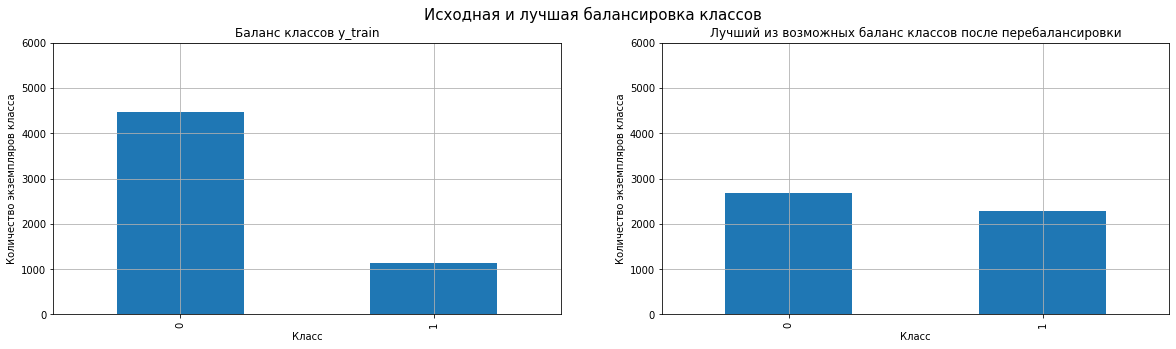

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) # размещаем в 1 строку и 2 столбца
fig.suptitle('Исходная и лучшая балансировка классов', fontsize=15)

y_train.value_counts().plot(ax = axes[0], kind='bar', title = 'Баланс классов y_train', grid=True)
best_y_train.value_counts().plot(ax = axes[1], kind='bar', title = 'Лучший из возможных баланс классов после перебалансировки', grid=True)
axes[0].set(xlabel = 'Класс')
axes[1].set(xlabel = 'Класс')
axes[0].set(ylabel = 'Количество экземпляров класса')
axes[1].set(ylabel = 'Количество экземпляров класса')
axes[0].set_ylim(0, 6000)
axes[1].set_ylim(0, 6000)
plt.show()

# 3. Выводы
<a id="3."></a>


| Модель                    |				Способ|f1_score (X_valid)|roc_auc score (при лучшем f1) (X_valid)|f1_score (X_test)| roc_auc score (при лучшем f1) (X_test) |
|---------------------------|-----|----|----|----|----------------------------------------|
| Логистическая регрессия   |  без взвешивания и балансировки классов и без масштабирования признаков|0,074|0,661|||
| Логистическая регрессия   |  без взвешивания и балансировки классов и с масштабированием признаков|0,325|0,501|||
| Случайный лес             |            без балансировки и взвешивания классов|0,576|0,858|||
| Случайный лес             |            без балансировки со взвешиванием классов|0,630|0,857|0,628| 0,867                                  |
| Случайный лес             |            с повышением  (upsampling) размерности класса 0|0,614|0,855|0,6103| 0,864                                  |
| Случайный лес             |            с понижением  (downsampling) размерности класса 1|0,631|0,857|0,625| 0,868                                  |
| Случайный лес             |            совмещенный (upsampling+downsampling) вариант|0,632|0,857|0,625| 0,865                                  |

таблица 1.

В таблице 1. сведены полученные результаты для различных способов обработки дисбаланса классов.

В результате проведенного исследования видно что:
1. Необходимо учитывать дисбаланс классов.
2. При проверке модели на валидационной выборке наибольший прирост дает изменение размерности классов, а на тестовой - взвешивание.
3. Понижение размерности преобладающего класса дает результат лучше чем повышение уступающему в численности классу. (как и при делении на 2 выборки, а не на три)
4. Совмещение способов изменения размерности классов в данном случае дало результат лучше чем понижение и повышение по отдельности. (Но как показывает опыт предыдущей версии задания, это зависит от конкретного датасета.)
5. Максимумы для Roc Auc и для F1 имеют максимумы на различных соотношениях ресемплирования выбокри.
6. Логистическая регрессия в данном случае не дала ощутимых результатов. В качестве варианта причины - нелинейность зависимости значений.